In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# installare (se necessario) e importare GeoPandas
!pip install geopandas
import geopandas 
!pip install contextily
import contextily as ctx


     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 15.4 MB 62.8 MB/s 
     |████████████████████████████████| 6.3 MB 46.5 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [3]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [4]:
cycle_routes = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/bike_ciclabili.zip')
cycle_routes

,id_amat,id_via,anagrafica,gerarchia,rete,tipologia,sede,marcia,norma,lunghezza,geometry
0,9001,1064,PIAZZA VENTICINQUE APRILE,None,urbana,percorso promiscuo - pedonale e ciclabile,carreggiata,bidirezionale,FACILITAZIONE - area pedonale,43.0,"LINESTRING (9.18700 45.48095, 9.18696 45.48085..."
1,9002,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,465.0,"LINESTRING (9.24192 45.43931, 9.24202 45.43939..."
2,9003,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,60.0,"LINESTRING (9.23979 45.43996, 9.23991 45.43998..."
3,9004,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,6.0,"LINESTRING (9.23902 45.44251, 9.23898 45.44256)"
4,9005,3377,VIA GIACOMO MEDICI DEL VASCELLO,None,ciclabile,corsia ciclabile - sede propria,marciapiede,bidirezionale,ordinanza lavori stradali,28.0,"LINESTRING (9.23990 45.43999, 9.23985 45.44009..."
...,...,...,...,...,...,...,...,...,...,...,...
3160,12932,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,4.0,"LINESTRING (9.14977 45.46021, 9.14979 45.46024)"
3161,12933,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,10.0,"LINESTRING (9.14966 45.46050, 9.14972 45.46057)"
3162,12934,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - bike lane,carreggiata,monodirezionale - concorde,ordinanza lavori stradali,5.0,"LINESTRING (9.14963 45.46046, 9.14966 45.46050)"
3163,12935,6272,VIALE ERGISTO BEZZI,None,ciclabile,corsia ciclabile - attraversamento DL 34/2020,attraversamento,monodirezionale - concorde,ordinanza lavori stradali,9.0,"LINESTRING (9.14957 45.46039, 9.14963 45.46046)"


In [5]:
# visualizzaere il geodataset delel piste ciclabili

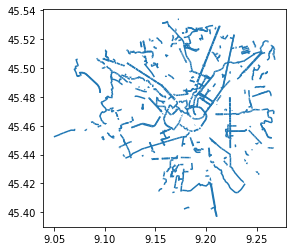

In [6]:
cycle_routes.plot()

In [7]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [8]:
districts = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip')
districts

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."
...,...,...,...,...,...,...,...,...,...
83,68,PAGANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5221.836696,1.289686e+06,172,"POLYGON ((9.17174 45.47619, 9.17150 45.47595, ..."
84,2,BRERA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,5461.667196,1.637333e+06,173,"POLYGON ((9.19165 45.46906, 9.19105 45.46843, ..."
85,33,ROGOREDO - SANTA GIULIA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6012.496435,1.200116e+06,174,"POLYGON ((9.24044 45.44427, 9.24084 45.44424, ..."
86,17,ADRIANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,9276.875747,2.433358e+06,175,"POLYGON ((9.26729 45.51234, 9.26701 45.51241, ..."


In [9]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

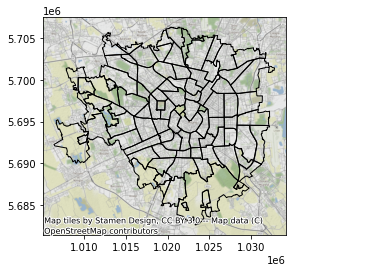

In [16]:
ax = districts.to_crs(epsg=3857).plot(facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

In [23]:
# trovare il quartiere meno esteso
mindistr = districts[districts.Shape_Area == districts.Shape_Area.min()]

In [24]:
# trovare il quartiere più esteso
maxdistr = districts[districts.Shape_Area == districts.Shape_Area.max()]

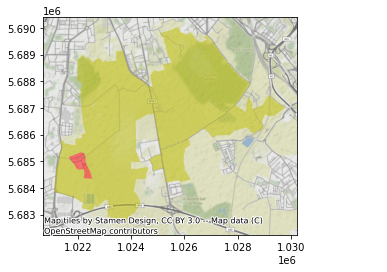

In [26]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax = maxdistr.to_crs(epsg=3857).plot(facecolor='y',alpha=.5)
mindistr.to_crs(epsg=3857).plot(facecolor='r',alpha=.5,ax=ax)
ctx.add_basemap(ax)

In [13]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [30]:
geopandas.GeoDataFrame(districts[districts.NIL.str.contains('AFFORI')])

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
69,80,AFFORI,05/02/2020,Vigente,Milano 2030 - PGT Approvato,6470.396969,2.070816e+06,158,"POLYGON ((9.17767 45.51899, 9.17796 45.51848, ..."


In [14]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [35]:
pisteAff = cycle_routes[cycle_routes.intersects(districts[districts.NIL.str.contains('AFFORI')].geometry.squeeze())]

In [15]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

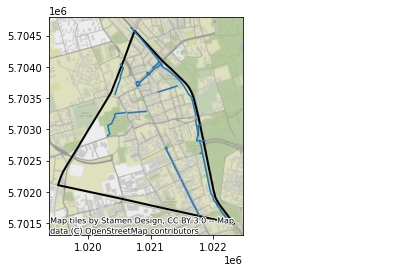

In [38]:
ax = districts[districts.NIL.str.contains('AFFORI')].to_crs(epsg=3857).plot(facecolor='none',edgecolor='k',linewidth=2)
pisteAff.to_crs(epsg=3857).plot(ax=ax)
ctx.add_basemap(ax)